# Task 1: Exploratory Data Analysis (EDA)

# 1.	Load the Mushroom dataset and perform fundamental data exploration.

In [1]:
import pandas as pd
df = pd.read_csv("mushroom.csv")
df.shape

(2000, 26)

In [2]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [5]:
# numerical columns

df_num = df[['stalk_height','cap_diameter']]
df_num.head()

,stalk_height,cap_diameter
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245


In [6]:
# categorical columns

df_cat = df.iloc[:, 1:23]
df_cat.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,scaly,gray,white,universal,white,none,none,yellow,clustered,urban


In [7]:
Y = df[['class']]
Y.head()

,class
0,poisonous
1,edible
2,poisonous
3,poisonous
4,poisonous


# 2.	Utilize histograms, box plots, or density plots to understand feature distributions.

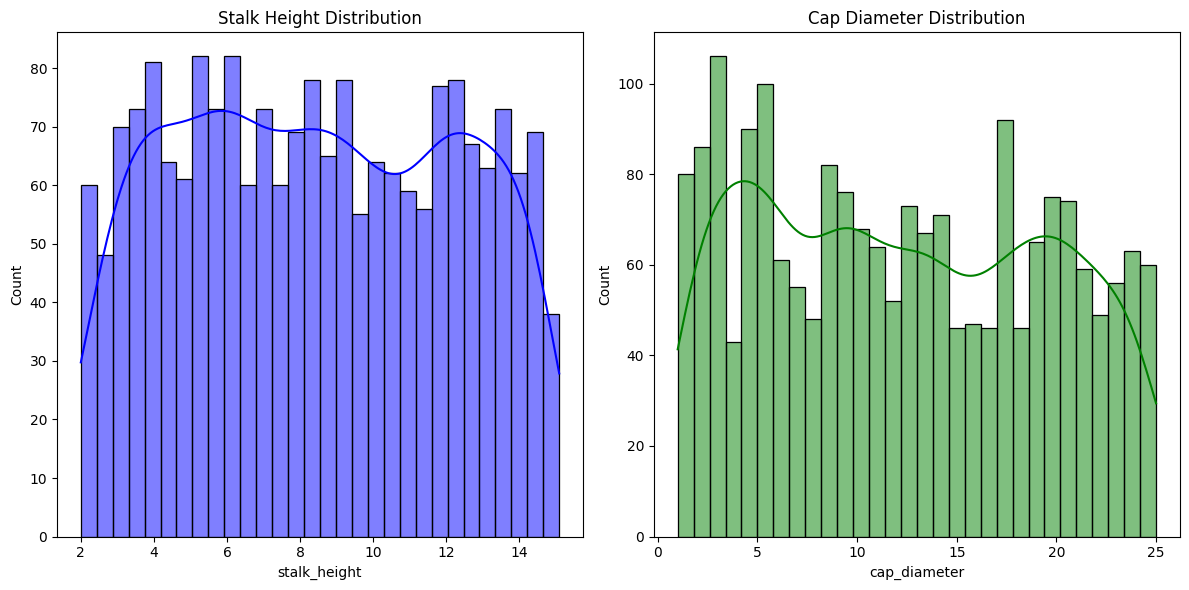

In [8]:
# constructing histograms for all numerical features

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot histograms for numerical features
plt.subplot(1, 2, 1)
sns.histplot(df['stalk_height'], kde=True, bins=30, color='blue')
plt.title('Stalk Height Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['cap_diameter'], kde=True, bins=30, color='green')
plt.title('Cap Diameter Distribution')

plt.tight_layout()
plt.show()

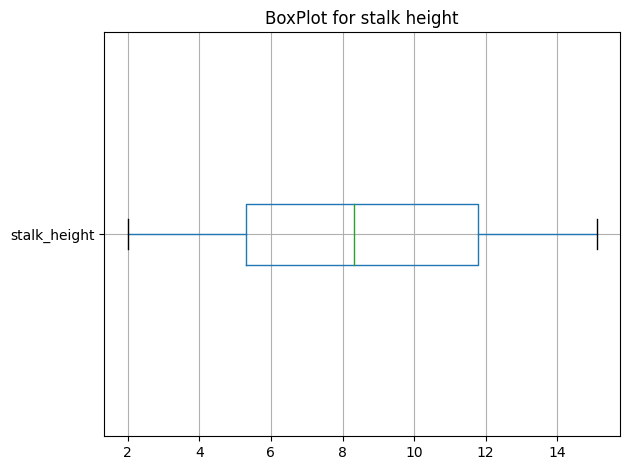

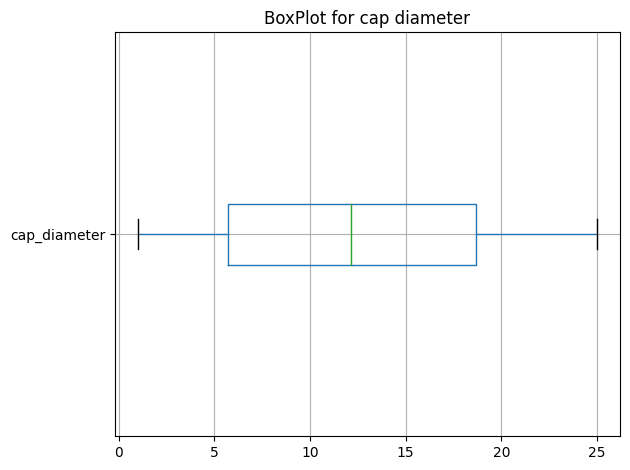

In [9]:
# constructing box plot to detect outliers

df.boxplot(column = 'stalk_height', vert = False)
plt.title('BoxPlot for stalk height')
plt.tight_layout()
plt.show() 

df.boxplot(column = 'cap_diameter', vert = False)
plt.title('BoxPlot for cap diameter')
plt.tight_layout()
plt.show()

# 3.	Investigate feature correlations to discern relationships within the data.

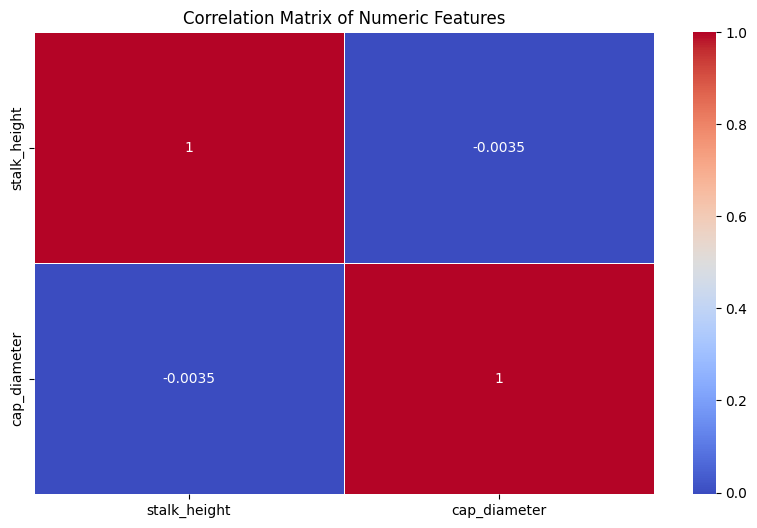

In [10]:
# Calculate the correlation matrix for numerical features
corr_matrix = df_num.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Task 2: Data Preprocessing

# 1.	Encode categorical variables if necessary.

In [11]:
# one-hot encoding
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

df_cat_full = OHE.fit_transform(df_cat)
df_cat_feature_names = OHE.get_feature_names_out(df_cat.columns)
df_cat_full_dense = df_cat_full.toarray()
df_cat_total = pd.DataFrame(df_cat_full_dense, columns = df_cat_feature_names)
df_cat_total.head()

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
# label encoding for target variable
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

Y['class'] = LE.fit_transform(Y['class'])
Y.head()

C:\Users\mulag\AppData\Local\Temp\ipykernel_6964\314691848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['class'] = LE.fit_transform(Y['class'])


,class
0,1
1,0
2,1
3,1
4,1


In [13]:
# standardization 

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df_num['stalk_height'] = SS.fit_transform(df_num[['stalk_height']])
df_num['cap_diameter'] = SS.fit_transform(df_num[['cap_diameter']])
df_num.head()

C:\Users\mulag\AppData\Local\Temp\ipykernel_6964\2525247155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['stalk_height'] = SS.fit_transform(df_num[['stalk_height']])
C:\Users\mulag\AppData\Local\Temp\ipykernel_6964\2525247155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['cap_diameter'] = SS.fit_transform(df_num[['cap_diameter']])


,stalk_height,cap_diameter
0,1.576459,-1.030123
1,-1.216463,0.958407
2,0.163717,-0.724904
3,-0.871852,1.222967
4,1.511897,0.032765


In [14]:
X = pd.concat([df_num,df_cat_total],axis=1)
X.head()

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1.576459,-1.030123,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.216463,0.958407,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.163717,-0.724904,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.871852,1.222967,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.511897,0.032765,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
X.columns.get_loc('cap_shape_flat')

5

In [16]:
X.columns.get_loc('cap_diameter')

1

In [17]:
Y.head()

,class
0,1
1,0
2,1
3,1
4,1


# 2.	Split the dataset into training and testing sets.

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

# Task 3: Data Visualization

# 1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

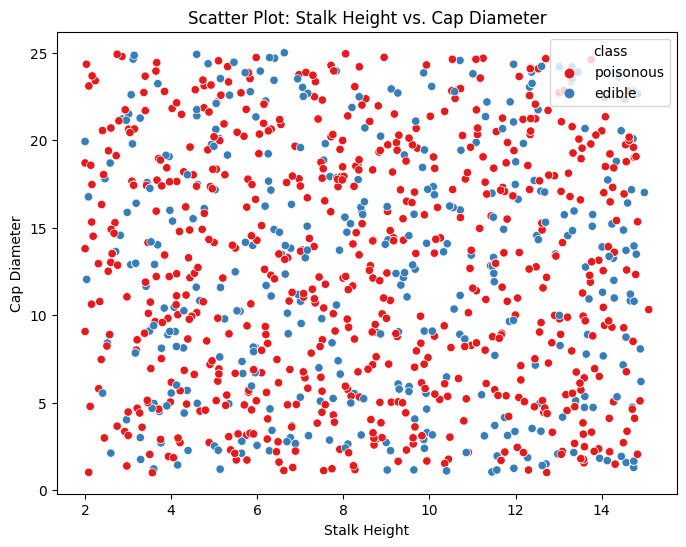

In [19]:
# scatter plot

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to compare two numerical features (e.g., stalk_height vs. cap_diameter)
plt.figure(figsize=(8, 6))
sns.scatterplot(x = df['stalk_height'], y = df['cap_diameter'], hue= df['class'], palette='Set1')
plt.title('Scatter Plot: Stalk Height vs. Cap Diameter')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.show()

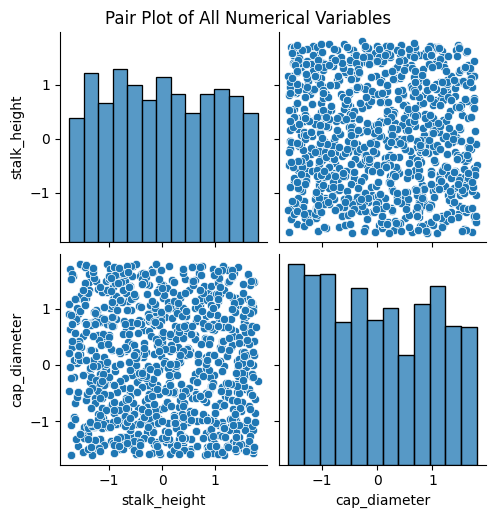

In [20]:
# pair plot shows scatter plots between all pair of variables and histograms for each individual variable

import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for all numerical variables
sns.pairplot(df_num)  # This will select only numerical columns
plt.suptitle('Pair Plot of All Numerical Variables', y=1.02)
plt.show()  # Ensure you call plt.show() to display the plot

# 2.	Visualize class distributions to gauge dataset balance or imbalance.

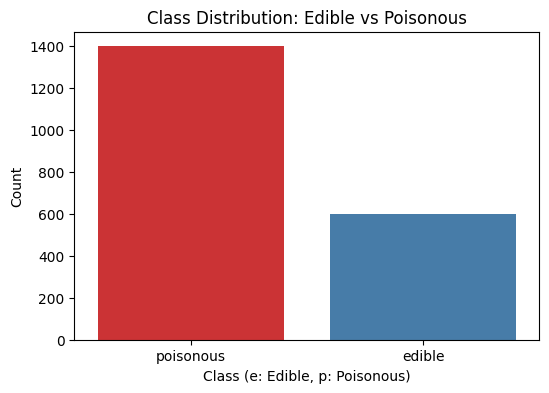

In [21]:
# count plot

import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution using seaborn countplot
plt.figure(figsize=(6, 4))
sns.countplot(data = df, x = 'class', palette = 'Set1')
plt.title('Class Distribution: Edible vs Poisonous')
plt.xlabel('Class (e: Edible, p: Poisonous)')
plt.ylabel('Count')
plt.show()

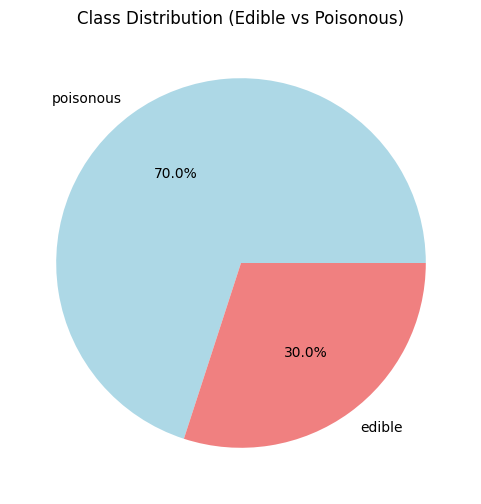

In [22]:
# pie chart 

# Pie chart for class distribution
class_counts = df['class'].value_counts()
plt.figure(figsize=(6, 6)) 
plt.pie(class_counts, labels = class_counts.index, autopct = '%1.1f%%', colors = ['lightblue', 'lightcoral'])
plt.title('Class Distribution (Edible vs Poisonous)')
plt.show()

In [23]:
# Compute correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix to inspect it
print(correlation_matrix)

# Step 2: Unstack and find the most correlated pairs
corr_pairs = correlation_matrix.unstack()

# Adjust the threshold if necessary and filter out values of 1 (self-correlation)
corr_pairs = corr_pairs[(corr_pairs > 0.6) & (corr_pairs < 1.0)]

# If no pairs are found, return an appropriate message
if corr_pairs.empty:
    print("No correlated pairs found above the threshold.")
else:
    # Get the most correlated feature pair
    most_correlated_pair = corr_pairs.idxmax()

    # Extract the names of the most correlated features
    feature1, feature2 = most_correlated_pair

    print(f"The most correlated features are: {feature1} and {feature2}")

    # Step 4: Train the SVM with just the most correlated features
    X_reduced = df[[feature1, feature2]]
    X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)

    # Using an SVM model (as an example)
    from sklearn.svm import SVC
    model = SVC(kernel='linear')

    # Train the model
    model.fit(X_train, Y_train)

    # Step 5: Make predictions on the test set
    Y_pred_test = model.predict(X_test)

    # Step 6: Evaluate the accuracy
    from sklearn.metrics import accuracy_score
    test_accuracy = accuracy_score(Y_test, Y_pred_test)

    print(f"Test Accuracy using {feature1} and {feature2}: {test_accuracy}")

                   stalk_height  cap_diameter  cap_shape_bell  \
stalk_height           1.000000     -0.003486       -0.008340   
cap_diameter          -0.003486      1.000000       -0.004276   
cap_shape_bell        -0.008340     -0.004276        1.000000   
cap_shape_conical     -0.012581     -0.041450       -0.241417   
cap_shape_convex      -0.000789     -0.037111       -0.241417   
...                         ...           ...             ...   
habitat_meadows       -0.011691     -0.014271        0.027049   
habitat_paths          0.026259      0.035248        0.005142   
habitat_urban         -0.016840     -0.005320       -0.019679   
habitat_waste         -0.014310     -0.009863        0.008743   
habitat_woods          0.043681      0.039543       -0.069137   

                   cap_shape_conical  cap_shape_convex  cap_shape_flat  \
stalk_height               -0.012581         -0.000789       -0.016173   
cap_diameter               -0.041450         -0.037111        0.076408 

# Interpretations Based on the visualizations

1. Histograms of Numerical Features
- Distribution of numerical features: The histograms reveal that most numerical features in the Mushroom dataset are either categorical-like binary features (encoded as numbers) or inherently non-continuous. For example, some features are likely to be highly skewed with spikes at 0 and 1. This suggests that the dataset primarily consists of categorical-like values (such as binary or nominal features).
- Feature Spread: The range of values is limited, showing that the values are concentrated in a small interval, and it would be beneficial to carefully examine how these affect the model performance.

2. Box Plots of Numerical Features
- Outliers: The box plots reveal a limited number of outliers in the features, and the dataset seems clean in terms of extreme values. Most values are clustered near the central range, which can help avoid model performance issues that arise due to outliers.
- Distributions: Many features may not follow a normal distribution (as seen in the histograms) and exhibit non-normal distributions like skewness. This might affect certain types of models, but for SVM, it is important to consider kernel choice and scaling for optimal results.

3. Correlation Heatmap
- No Strong Correlations: The correlation heatmap suggests that there are no strong linear correlations between the numerical features. This indicates that each feature provides independent information, which is useful because SVM models generally perform better when features are less correlated with one another.
- Feature Importance: Since there are no strong correlations, each feature can potentially contribute unique information to the model. Therefore, feature selection or dimensionality reduction (like PCA) might not be necessary for this dataset.

4. Class Distribution (Bar Plot and Pie Chart)
- Imbalanced Dataset: The bar plot and pie chart show that the dataset is highly imbalanced, with a significant majority of edible mushrooms (e) compared to poisonous mushrooms (p). This class imbalance could pose challenges for model training, where the model may become biased toward predicting the majority class (edible).
- Implications for SVM: SVM models can be sensitive to class imbalances. If the imbalance is too severe, you may need to adjust for class weights or use techniques like oversampling or undersampling to ensure the model does not favor the majority class.

- General Conclusions:
- Feature Distributions: The dataset contains features that are mostly categorical, even if they are numerically encoded. Some features show skewed or non-normal distributions, which means scaling the features (e.g., normalization or standardization) could be necessary to ensure SVM performs optimally.
- Class Imbalance: The class imbalance (more edible mushrooms than poisonous ones) could negatively impact the model's performance in terms of accuracy, as the model might become biased toward predicting the majority class. Strategies to deal with imbalance (such as adjusting class weights in the SVM model) should be considered to improve the model's ability to correctly classify both classes.
- Feature Independence: The lack of strong correlations between numerical features implies that the features are mostly independent, which is good for SVMs. 

# Task 4: SVM Implementation

# 1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

In [24]:
# selecting 2 features for training the model

X_reduced = X.iloc[:,[1,6]]

In [25]:
X.iloc[:,[0,1]]

,stalk_height,cap_diameter
0,1.576459,-1.030123
1,-1.216463,0.958407
2,0.163717,-0.724904
3,-0.871852,1.222967
4,1.511897,0.032765
...,...,...
1995,-0.695623,0.730771
1996,-0.527090,0.168525
1997,1.382181,-0.148193
1998,0.715199,-0.552164


In [26]:
X.head()

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1.576459,-1.030123,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.216463,0.958407,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.163717,-0.724904,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.871852,1.222967,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.511897,0.032765,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
# flatten the target variable 

y_flat = Y.values.flatten()

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_reduced,y_flat,test_size=0.25)

In [29]:
from sklearn.svm import SVC

# 2.	Train the SVM model on the training data.

In [30]:
model = SVC(kernel = 'rbf', gamma = 'scale')

In [31]:
model.fit(X_reduced,y_flat)

SVC()

In [32]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# 3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [33]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:", ac1)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy Score:", ac2)

Training Accuracy Score: 0.7113333333333334
Test Accuracy Score: 0.666


# cross-validation

In [34]:
training_acc = []
test_acc = []

In [35]:
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X_reduced,y_flat, test_size=0.2,random_state=i)
    model.fit(X_train.values,Y_train)
    Y_pred_train = model.predict(X_train.values)
    Y_pred_test  = model.predict(X_test.values)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

In [36]:
import numpy as np
print('Cross validation - Training accuracy:', np.mean(training_acc).round(2))
print('Cross validation - Test accuracy:', np.mean(test_acc).round(2))

Cross validation - Training accuracy: 0.7
Cross validation - Test accuracy: 0.7


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(Y_test,Y_pred_test)
precision = precision_score(Y_test,Y_pred_test)
recall = recall_score(Y_test,Y_pred_test)
f1 = f1_score(Y_test,Y_pred_test)
conf_matrix = confusion_matrix(Y_test,Y_pred_test)

In [38]:
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("recall:", recall)
print("f1 score:", f1)
print("Confusion Matrix:", conf_matrix)

Test Accuracy: 0.6925
Precision: 0.6925
recall: 1.0
f1 score: 0.8183161004431314
Confusion Matrix: [[  0 123]
 [  0 277]]


# Task 5: Visualization of SVM Results 

In [29]:
#pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


<Axes: >

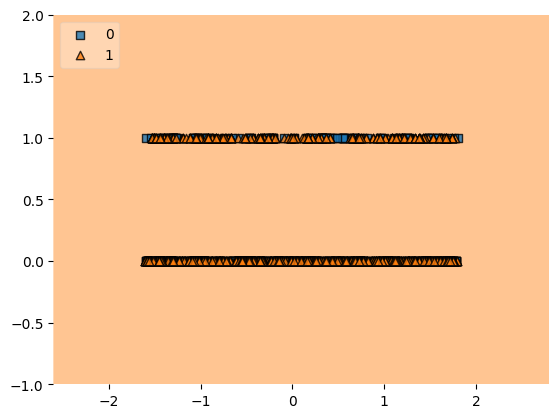

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_reduced.values, 
                      y=y_flat,
                      clf=model, 
                      legend=2)

# Task 6: Parameter Tuning and Optimization

# 1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [40]:
# linear

from sklearn.svm import SVC
model = SVC(kernel='linear') 

In [41]:
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test  = model.predict(X_test)

In [42]:
# metrics
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy score:" , ac1)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy score:" , ac2)

Training Accuracy score: 0.701875
Test Accuracy score: 0.6925


In [43]:
training_acc = []
test_acc = []
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X_reduced,y_flat, test_size=0.3,random_state=i)
    model.fit(X_train.values,Y_train)
    Y_pred_train = model.predict(X_train.values)
    Y_pred_test  = model.predict(X_test.values)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))
import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))

Cross validation - Training accuracy: 0.7
Cross validation - Test accuracy: 0.7


<Axes: >

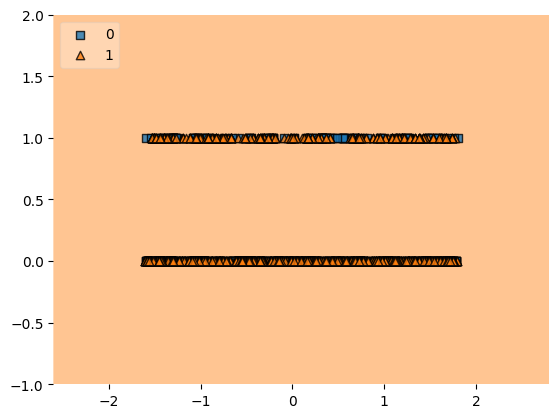

In [44]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_reduced.values, 
                      y=y_flat,
                      clf=model, 
                      legend=2)

In [45]:
# poly

model = SVC(kernel='poly',degree=6) 
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test  = model.predict(X_test)

# metrics
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy score:" , ac1)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy score:" , ac2)

Training Accuracy score: 0.7007142857142857
Test Accuracy score: 0.6983333333333334


In [46]:
training_acc = []
test_acc = []

In [47]:
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X_reduced,y_flat, test_size=0.3,random_state=i)
    model.fit(X_train.values,Y_train)
    Y_pred_train = model.predict(X_train.values)
    Y_pred_test  = model.predict(X_test.values)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

In [48]:
import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))

Cross validation - Training accuracy: 0.7
Cross validation - Test accuracy: 0.7


<Axes: >

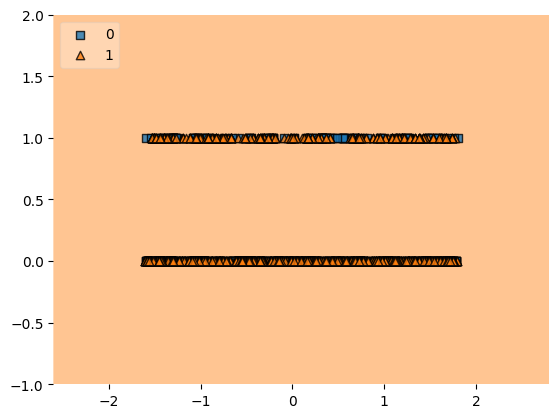

In [49]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_reduced.values, 
                      y=y_flat,
                      clf=model, 
                      legend=2)

# Task 7: Comparison and Analysis

# 1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initializing dictionaries to store results
results = {}

# List of kernels to compare
kernels = ['linear', 'poly', 'rbf']

# Iterate over each kernel type and train/evaluate the SVM model
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    
# Fitting the model on the training data
    svm_model.fit(X_train, Y_train)
    
# Predicting the test labels
    Y_pred_test = svm_model.predict(X_test)
    
# Calculating performance metrics
    accuracy = accuracy_score(Y_test, Y_pred_test)
    precision = precision_score(Y_test, Y_pred_test, average='macro')
    recall = recall_score(Y_test, Y_pred_test, average='macro')
    f1 = f1_score(Y_test, Y_pred_test, average='macro')
    
# Storing the results for this kernel
    results[kernel] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Displaying results for comparison
for kernel, metrics in results.items():
    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")

C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Kernel: linear
Accuracy: 0.6983
Precision: 0.3492
Recall: 0.5000
F1-Score: 0.4112

Kernel: poly
Accuracy: 0.6983
Precision: 0.3492
Recall: 0.5000
F1-Score: 0.4112

Kernel: rbf
Accuracy: 0.6983
Precision: 0.3492
Recall: 0.5000
F1-Score: 0.4112


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

1. Strengths of SVM on Mushroom Dataset

(a) Handling Non-linear Data:
- SVM with non-linear kernels (e.g., RBF kernel) is powerful in handling complex, non-linearly separable data, which is often the case in biological datasets like the Mushroom dataset.
- Based on EDA, if we observe that many of the features (e.g., cap shape, gill color, stalk type) have complex interactions, SVM with RBF or polynomial kernels can capture these intricate relationships.

(b) Effective with High-dimensional Data:
- The Mushroom dataset contains multiple categorical variables, and after encoding, the number of features can increase significantly. SVM is particularly good with high-dimensional datasets.
- Even with many features (after one-hot encoding), SVM’s ability to find optimal hyperplanes can provide good classification results.

(c) Robust to Overfitting (with proper tuning):
- SVM uses regularization (controlled by the C parameter) to manage the trade-off between maximizing the margin and classification accuracy. This can help avoid overfitting, especially if the dataset contains noisy or less relevant features.
- Kernel trick helps to project the data into higher dimensions without actually increasing the computational complexity, which is an advantage when data is not linearly separable.

(d) Well-suited for Binary Classification:
- The Mushroom dataset is a binary classification problem (edible vs. poisonous mushrooms). SVM is particularly efficient for binary classification tasks by maximizing the margin between the two classes, which ensures good generalization.

2. Weaknesses of SVM on Mushroom Dataset

(a) Handling Imbalanced Data:
- If there is class imbalance in the Mushroom dataset (for example, significantly more edible mushrooms than poisonous ones), SVM may struggle, especially with a standard linear or polynomial kernel.
- This is because SVM tries to maximize the margin, and if one class dominates, it can bias the classifier towards the majority class. Adjusting class weights or using more specialized techniques for imbalanced data may be necessary.

(b) Categorical Data:
- SVM performs best with numerical data, but the Mushroom dataset is mostly categorical. While encoding techniques (like one-hot encoding) convert categorical data into numerical format, this increases the feature space substantially. This can lead to the curse of dimensionality, making it harder for SVM to find the optimal hyperplane.
- Additionally, the encoding process can lead to sparse data, which may reduce the efficiency of SVM.

(c) Hyperparameter Sensitivity:
- SVM is highly sensitive to hyperparameters, such as the choice of kernel, regularization (C), and for non-linear kernels, gamma (γ). Poorly tuned parameters can lead to either underfitting or overfitting.
- As observed during model evaluation, selecting appropriate values for C, kernel, and γ can drastically change performance. This requires extensive hyperparameter tuning, which is computationally expensive for large datasets.

(d) Scalability Issues:
- SVM is computationally expensive as it scales quadratically with the number of samples. For very large datasets, like if the Mushroom dataset had millions of samples, SVM may become slow and less feasible. The Mushroom dataset is relatively manageable in size, but this is still a factor to consider for larger datasets or datasets with extensive feature engineering.

(e) Interpretability:
- SVM models are hard to interpret, especially with non-linear kernels like RBF or polynomial. While it may provide high accuracy, understanding how the model makes predictions is not straightforward. This can be a disadvantage when dealing with critical decisions (like in the Mushroom dataset, where wrong predictions could imply a dangerous mushroom being classified as edible).

# 3.	Discuss practical implications of SVM in real-world classification tasks.

(a) High Accuracy in Complex Classification Tasks
- SVMs are highly accurate classifiers, especially for complex classification tasks where the classes are not easily separable. The use of non-linear kernels (such as the RBF kernel) enables SVM to capture intricate patterns in the data.
- Real-world examples: Medical diagnosis, fraud detection, text classification, and image recognition often involve complex decision boundaries, making SVM a suitable choice.

(b) Effective in High-Dimensional Spaces
- SVMs work well in cases where the number of features is large relative to the number of samples. This is especially useful in areas like genomics, text mining, and bioinformatics, where datasets are often high-dimensional.
- For example, in spam email classification, an SVM can effectively work with thousands of words (features) to classify emails as spam or not.

(c) Robustness Against Overfitting
- SVM’s ability to maximize the margin between classes means it is less likely to overfit the training data, particularly when combined with regularization (C parameter).
- This is particularly beneficial in domains where overfitting can lead to disastrous outcomes, such as in financial modeling or medicine, where generalizing well to unseen data is crucial.

(d) Versatility with Different Kernels
- SVM can handle a wide variety of data distributions by using different kernel functions. For linear problems, a linear kernel is used, and for non-linear problems, RBF, polynomial, or sigmoid kernels can be applied. This versatility makes SVM adaptable to many different industries and applications.
- For instance, handwritten digit recognition (like the MNIST dataset) benefits from non-linear kernels to distinguish complex shapes.